<a href="https://colab.research.google.com/github/aagusw/Phd-Research-Update/blob/main/Copy_of_DSM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install Geopandas

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pip install rioxarray

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 65.7 MB/s eta 0:00:00


In [4]:
pip install geopandas

In [5]:
pip install earthpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 13.6 MB/s eta 0:00:00


In [6]:
# Import necessary packages
import os

import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import rioxarray as rxr

# Earthpy is an earthlab package to work with spatial data
import earthpy as et
import earthpy.plot as ep

# Get data and set working directory
# et.data.get_data("")
# os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))

In [7]:
# Read the data in and call it lidar_dtm (this is the variable name)
lidar_dtm = rxr.open_rasterio('/content/DTM_F0214246_20191126_20191127.tif', masked=True)

In [9]:
from scipy.io import netcdf
import numpy as np
import pandas as pd
import matplotlib as mpt
import matplotlib.pyplot as plt

In [10]:
!pip install Pillow

In [11]:
from PIL import Image

# Replace 'your_image.tif' with the path to your TIF file
file_path = '/content/DTM_F0214246_20191126_20191127.tif'

# Open the TIF file
image = Image.open(file_path)

# Display the image
image.show()

In [12]:
image.show()

In [13]:
# Create a path to file
lidar_dtm_path = os.path.join("colorado-flood",
                              "spatial",
                              "boulder-leehill-rd",
                              "pre-flood",
                              "lidar",
                              "/content/DTM_F0214246_20191126_20191127.tif")
lidar_dtm_path

'/content/DTM_F0214246_20191126_20191127.tif'

In [15]:
# Open and read in the digital terrain model
# Note that rxr is the alias for rioxarray
lidar_dtm = rxr.open_rasterio('/content/DTM_F0214246_20191126_20191127.tif', masked=True)

# View the data - notice the data structure is different from geopandas data
# which you explored in the last lesson
lidar_dtm

<xarray.DataArray (band: 1, y: 2000, x: 2000)>
[4000000 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 5.14e+05 5.14e+05 5.14e+05 ... 5.16e+05 5.16e+05
  * y            (y) float64 4.22e+05 4.22e+05 4.22e+05 ... 4.2e+05 4.2e+05
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    RepresentationType:  ATHEMATIC
    STATISTICS_MAXIMUM:  12.057999610901
    STATISTICS_MEAN:     4.4079921862164
    STATISTICS_MINIMUM:  -2.7400000095367
    STATISTICS_STDDEV:   3.2269504391694
    scale_factor:        1.0
    add_offset:          0.0

In [16]:
type(lidar_dtm)

xarray.core.dataarray.DataArray

In [17]:
# View the min and max values of the array
print(lidar_dtm.min(), lidar_dtm.max())

<xarray.DataArray ()>
array(-2.74, dtype=float32)
Coordinates:
    spatial_ref  int64 0 <xarray.DataArray ()>
array(12.058, dtype=float32)
Coordinates:
    spatial_ref  int64 0


In [18]:
# View the dimensions of the array (rows, columns)
lidar_dtm.shape

(1, 2000, 2000)

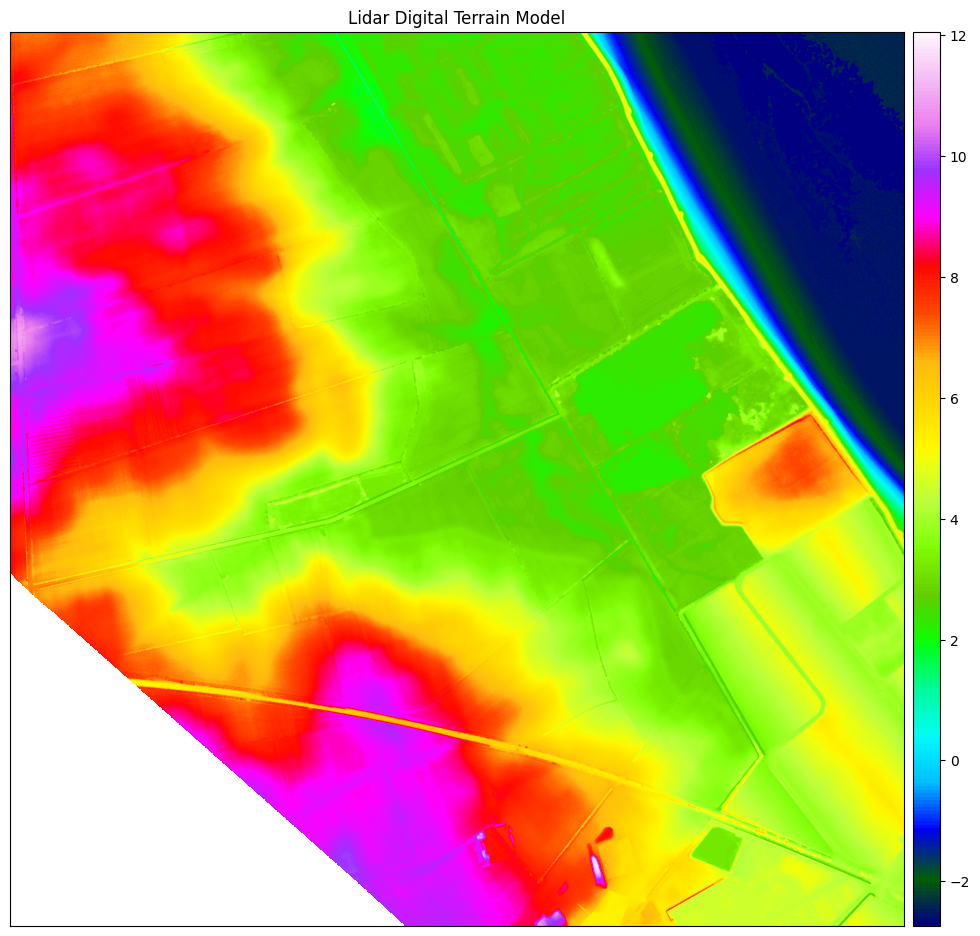

In [19]:
ep.plot_bands(lidar_dtm,
              scale=False,
              cmap='gist_ncar',
              title="Lidar Digital Terrain Model")
plt.show()

In [31]:
import geopandas as gpd
import rasterio
from shapely.geometry import Point
from rasterio import features

# Specify the path to your GeoTIFF file
tif_file_path = '/content/DTM_F0214246_20191126_20191127.tif'

# Open the GeoTIFF file using rasterio
with rasterio.open(tif_file_path) as src:
    # Read raster data
    raster_data = src.read()


# Specify the path to your GeoTIFF file
tif_file_path = '/content/DTM_F0214246_20191126_20191127.tif'

# Open the GeoTIFF file using rasterio
with rasterio.open(tif_file_path) as src:
    # Read raster data
    raster_data = src.read()

    # Generate a mask for the raster data
    mask = raster_data[0] != src.nodatavals[0]

    # Create a GeoDataFrame from the mask
    shapes = features.shapes(mask, transform=src.transform)
    gdf = gpd.GeoDataFrame({'/content/DTM_F0214246_20191126_20191127.tif': shapes}, crs=src.crs)

geometry = [Point(0, 0), Point(1, 1), Point(2, 2)]
data = {'/content/DTM_F0214246_20191126_20191127.tif': ['A', 'B', 'C'], 'value': [10, 20, 30]}

# Create a GeoDataFrame from the raster data (example: assuming a single band)
gdf = gpd.GeoDataFrame(data, geometry=geometry, crs='EPSG:4326', index=[1, 2, 3])
gdf['geometry'] = gpd.GeoSeries.from_raster(src.transform, r)

# Display the GeoDataFrame
print(gdf)

ValueError: ignored

In [25]:
type('geometry')

str